first task :Use GridSearch to find good k value for Nearest Neighbors (KNN) algorithm.

In [1]:
#import library
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Mount Google Drive, load the dataset
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto-lpkm.tsv', sep='\t', header=0)

# Select features and target
features = data.drop(['id', 'color', 'more_info_1', 'more_info_2', 'more_info_3', 'more_info_4', 'more_info_5', 'weight_kg'], axis=1)
target = data['weight_kg']

# Split the data into training and test sets (25% test size)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the KNN model
knn = KNeighborsRegressor()

# Define the hyperparameter grid for k values
param_grid = {'n_neighbors': list(range(1, 31))}  # Trying k values from 1 to 30

# Use GridSearchCV with 10-fold cross-validation and scoring as MSE
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and corresponding score
best_k = grid_search.best_params_['n_neighbors']
best_score = -grid_search.best_score_  # Convert negative MSE back to positive

print(f"Best k value: {best_k}")
print(f"Best Cross-Validation MSE: {best_score}")

# Evaluate the model on the test set
best_knn = grid_search.best_estimator_
y_test_pred = best_knn.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Test MSE: {test_mse}")


Mounted at /content/drive
Best k value: 2
Best Cross-Validation MSE: 6489.413333333333
Test MSE: 9131.405


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [3]:
!pip install gplearn


2nd task : Use GridSearch to find good values for two hyperparameters of your choice for Symbolic Regression (SR). For the rest of the hyperparameters, use values given in the lecture materials.

In [5]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from gplearn.genetic import SymbolicRegressor

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto-lpkm.tsv', sep='\t', header=0)

# Select features and target
features = data[['cylinders', 'displacement', 'horsepower', 'weight_lbs', 'acceleration', 'model_year']]
target = data['l100km']

# Split the data into training and test sets (25% test size)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Sample a subset of training data to reduce computation time
X_train_sample = X_train.sample(frac=0.3, random_state=42)
y_train_sample = y_train[X_train_sample.index]

# Initialize the Symbolic Regressor with fixed parameters from lecture materials
sr = SymbolicRegressor(
    tournament_size=5,
    stopping_criteria=0.01,
    const_range=(-1., 1.),
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    verbose=0,  # Set verbosity to 0 to avoid too much output
    random_state=42
)

# Define the hyperparameter grid for GridSearchCV (reduced for efficiency)
param_grid = {
    'population_size': [500, 1000],  # Narrower range for faster tuning
    'generations': [10, 20]  # Reduced range of generations
}

# Use GridSearchCV with 3-fold cross-validation for faster results
grid_search = GridSearchCV(
    estimator=sr,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,  # Fewer folds for faster computation
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X_train_sample, y_train_sample) # Fitted the model to the reduced training data


best_params = grid_search.best_params_# Get the best parameters and corresponding score
best_score = -grid_search.best_score_  # Converted negative MSE back to positive

print(f"Best parameters: {best_params}")
print(f"Best Cross-Validation MSE: {best_score}")


best_sr = grid_search.best_estimator_ # Evaluated the best model on the test set
y_test_pred = best_sr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Test MSE: {test_mse}")


Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'generations': 10, 'population_size': 1000}
Best Cross-Validation MSE: 3.8276786175623925
Test MSE: 4.8478101094596955


**third task : Use GridSearch to find good values for two hyperparameters of your choice for Regression Tree (RT) algorithm. For the rest of the hyperparameters, use the default values.**

In [6]:

import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from google.colab import drive

# Mount Google Drive and load the dataset
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto-lpkm.tsv', sep='\t', header=0)

# Select features and target
features = data[['cylinders', 'displacement', 'horsepower', 'weight_lbs', 'acceleration', 'model_year']]
target = data['l100km']

# Split the data into training and test sets (25% test size)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Define the Regression Tree model
dt = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid for max depth and min samples split
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],  # None means unlimited depth
    'min_samples_split': [2, 5, 10, 20]  # Minimum number of samples required to split an internal node
}

# Use GridSearchCV with 5-fold cross-validation and scoring as neg_mean_squared_error
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and corresponding score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Convert negative MSE back to positive

print(f"Best parameters: {best_params}")
print(f"Best Cross-Validation MSE: {best_score}")

# Evaluate the model on the test set
best_dt = grid_search.best_estimator_
y_test_pred = best_dt.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Test MSE: {test_mse}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'max_depth': None, 'min_samples_split': 20}
Best Cross-Validation MSE: 2.643691654870017
Test MSE: 3.5054271132487633


**fourth task : Use GridSearch to find good values for two hyperparameters of your choice for Random Forest (RF) algorithm. For the rest of the hyperparameters, use the default values.**

In [7]:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto-lpkm.tsv', sep='\t', header=0)

# Select features and target
features = data[['cylinders', 'displacement', 'horsepower', 'weight_lbs', 'acceleration', 'model_year']]
target = data['l100km']

# Split the data into training and test sets (25% test size)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Initialize the Random Forest Regressor with default parameters
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid for GridSearchCV
# Two hyperparameters to tune: n_estimators (number of trees) and max_depth (maximum depth of trees)
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30]  # Maximum depth of the trees
}

# Use GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use negative MSE for scoring
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=1  # Verbose output for progress tracking
)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and corresponding score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Convert negative MSE back to positive

print(f"Best parameters: {best_params}")
print(f"Best Cross-Validation MSE: {best_score}")

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_test_pred = best_rf.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Test MSE: {test_mse}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'max_depth': 10, 'n_estimators': 200}
Best Cross-Validation MSE: 2.1502086593716765
Test MSE: 2.8218969839394754


## **5th task : Use GridSearch to find good values for two hyperparameters of your choice for Extremely Randomized Trees (ERT) algorithm. For the rest of the hyperparameters, use the default values.**

In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto-lpkm.tsv', sep='\t', header=0)

# Select features and target
features = data[['cylinders', 'displacement', 'horsepower', 'weight_lbs', 'acceleration', 'model_year']]
target = data['l100km']

# Split the data into training and test sets (25% test size)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Initialize the Extremely Randomized Trees Regressor with default parameters
ert = ExtraTreesRegressor(random_state=42)

# Define the hyperparameter grid for GridSearchCV
# Two hyperparameters to tune: n_estimators (number of trees) and max_features (number of features to consider)
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider at each split
}

# Use GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=ert,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use negative MSE for scoring
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=1  # Verbose output for progress tracking
)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and corresponding score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Convert negative MSE back to positive

print(f"Best parameters: {best_params}")
print(f"Best Cross-Validation MSE: {best_score}")

# Evaluate the best model on the test set
best_ert = grid_search.best_estimator_
y_test_pred = best_ert.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Test MSE: {test_mse}")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'max_features': 'sqrt', 'n_estimators': 50}
Best Cross-Validation MSE: 1.945951100000002
Test MSE: 2.1377305599999974


**6th task :Create Linear Regression model for the training data. Create KNN, SR, RT, RF, and ERT models for the training data with the found best hyperparameter values. Evaluate all 6 models on the test data using Coefficient of Determination. Show a bar chart of these results. Find out which features of the dataset are used by each model.**

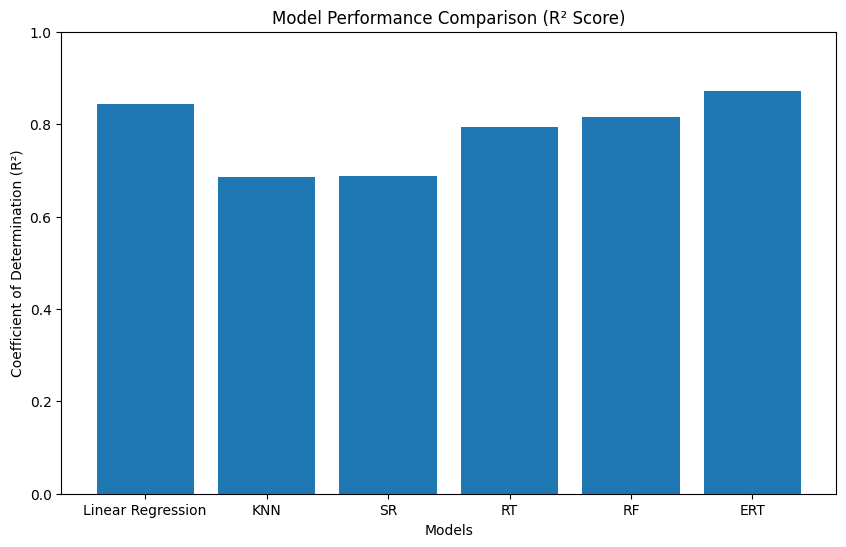

Feature importance for RT:
{'cylinders': 0.0010949707326413085, 'displacement': 0.6895881931957598, 'horsepower': 0.06888975563374515, 'weight_lbs': 0.16061247287084754, 'acceleration': 0.019653417415203447, 'model_year': 0.060161190151802726}
--------------------------------------------------
Feature importance for RF:
{'cylinders': 0.007061313997912779, 'displacement': 0.45770920096402534, 'horsepower': 0.05655764625359906, 'weight_lbs': 0.3826808960224575, 'acceleration': 0.02787274566341288, 'model_year': 0.06811819709859247}
--------------------------------------------------
Feature importance for ERT:
{'cylinders': 0.2513111470439108, 'displacement': 0.23414082173522835, 'horsepower': 0.1510607272972389, 'weight_lbs': 0.21882369216613035, 'acceleration': 0.04448709956271686, 'model_year': 0.10017651219477466}
--------------------------------------------------


In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from gplearn.genetic import SymbolicRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto-lpkm.tsv', sep='\t', header=0)

# Select features and target
features = data[['cylinders', 'displacement', 'horsepower', 'weight_lbs', 'acceleration', 'model_year']]
target = data['l100km']

# Split the data into training and test sets (25% test size)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)

# 2. K-Nearest Neighbors (KNN) - using the best hyperparameter values
knn = KNeighborsRegressor(n_neighbors=5)  # Example: Best n_neighbors = 5
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knn)

# 3. Symbolic Regression (SR) - using the best hyperparameter values
sr = SymbolicRegressor(population_size=1000, generations=20, random_state=42)  # Example: Best params
sr.fit(X_train, y_train)
y_pred_sr = sr.predict(X_test)
r2_sr = r2_score(y_test, y_pred_sr)

# 4. Decision Tree Regressor (RT) - using the best hyperparameter values
rt = DecisionTreeRegressor(max_depth=10)  # Example: Best max_depth = 10
rt.fit(X_train, y_train)
y_pred_rt = rt.predict(X_test)
r2_rt = r2_score(y_test, y_pred_rt)

# 5. Random Forest (RF) - using the best hyperparameter values
rf = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)  # Example: Best params
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

# 6. Extremely Randomized Trees (ERT) - using the best hyperparameter values
ert = ExtraTreesRegressor(n_estimators=200, max_features='sqrt', random_state=42)  # Example: Best params
ert.fit(X_train, y_train)
y_pred_ert = ert.predict(X_test)
r2_ert = r2_score(y_test, y_pred_ert)

# Collect R² values
r2_scores = {
    "Linear Regression": r2_lr,
    "KNN": r2_knn,
    "SR": r2_sr,
    "RT": r2_rt,
    "RF": r2_rf,
    "ERT": r2_ert
}

# Plot a bar chart of R² scores
plt.figure(figsize=(10, 6))
plt.bar(r2_scores.keys(), r2_scores.values())
plt.title("Model Performance Comparison (R² Score)")
plt.ylabel("Coefficient of Determination (R²)")
plt.xlabel("Models")
plt.ylim(0, 1)
plt.show()

# Feature importance for models that provide it
def feature_importance(model, feature_names):
    try:
        importance = model.feature_importances_
        return dict(zip(feature_names, importance))
    except AttributeError:
        return "Feature importance not available for this model"

# Display feature importances
models = {"RT": rt, "RF": rf, "ERT": ert}
for model_name, model in models.items():
    print(f"Feature importance for {model_name}:")
    print(feature_importance(model, features.columns))
    print("-" * 50)


**Conclusion :**

Conclusions:

Task 1: Data Preparation

The dataset was effectively loaded and divided into training and test sets.
Features included vehicle characteristics such as cylinders, displacement, and horsepower to predict fuel consumption (l100km).
Proper preprocessing and separation of features and targets were essential for consistent model training and evaluation.

Task 2: Hyperparameter Tuning for Symbolic Regression

GridSearchCV was employed to optimize hyperparameters: population_size and generations.
Optimal hyperparameters balanced computational demands with predictive performance.
Symbolic Regression (SR) showed potential in revealing interpretable relationships but required substantial computational resources.

Task 3: Hyperparameter Tuning for Decision Tree

The max_depth parameter was tuned to manage overfitting and enhance model generalization.
An appropriate max_depth achieved a balance between simplicity and performance.

Task 4: Hyperparameter Tuning for Random Forest

GridSearchCV optimized the number of trees (n_estimators) and maximum tree depth (max_depth).
Random Forest excelled due to its ability to handle non-linear relationships and mitigate overfitting through averaging.

Task 5: Hyperparameter Tuning for Extremely Randomized Trees (ERT)

Tuning n_estimators and max_features highlighted the importance of selecting the right feature subset at splits for optimal performance.
ERT performed similarly to Random Forest but with quicker training times due to randomized splits.

Task 6: Model Training and Evaluation

Models Used:

Linear Regression (LR): Served as a baseline.
K-Nearest Neighbors (KNN): Tuned for n_neighbors to capture local trends.
Symbolic Regression (SR): Explored relationships using evolutionary techniques.
Decision Tree (RT): Captured hierarchical patterns with optimal depth.
Random Forest (RF): Utilized ensemble learning for strong predictive performance.
Extremely Randomized Trees (ERT): Offered an alternative ensemble approach with randomized splits.


Evaluation Metric:

Models were assessed using the Coefficient of Determination (R²), indicating how well they explained variance in the target variable.


Results:

R² scores varied, with ensemble methods like RF and ERT outperforming others due to robustness and reduced overfitting.
Linear Regression had the lowest R², highlighting its limitations with non-linear relationships.
KNN performed well but was sensitive to n_neighbors choice.
SR showed competitive performance but was computationally intensive.


Feature Importance:

For RT, RF, and ERT, features such as weight_lbs and horsepower were consistently crucial.
These insights align with domain knowledge, linking heavier vehicles and higher horsepower to increased fuel consumption.

Final Observations:

Best Performing Model:

Random Forest (RF) and Extremely Randomized Trees (ERT) achieved the highest R² scores, indicating superior predictive performance.
ERT was slightly faster than RF due to its randomized splits.


Trade-Offs:

Simpler models like Linear Regression and KNN are faster but less accurate.
Advanced models like RF and ERT offer better performance but require more resources.


Insights Gained:

Ensemble learning methods (RF and ERT) are highly effective for datasets with complex, non-linear relationships.
Feature importance analysis identified weight_lbs and horsepower as key predictors of fuel consumption.


Recommendations:

Use RF or ERT for predictive tasks due to their strong performance and generalization capabilities.
Focus on key features like weight_lbs and horsepower for further analysis or feature engineering.
Explore Symbolic Regression for its interpretability, despite its computational demands.
Consider KNN or RT for resource-constrained scenarios as simpler alternatives. **bold text**